#DATASCI W261, Machine Learning at Scale
--------
####Assignement:  week \#10
#### Shih Yu Chang
####Due: 2016-11-22, 8AM PST

In [3]:
import os
import sys
spark_home = os.environ['SPARK_HOME'] = '/home/cloudera/Downloads/spark-2.0.1-bin-hadoop2.6/'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.0.1
      /_/

Using Python version 2.7.11 (default, Dec  6 2015 18:08:32)
SparkSession available as 'spark'.


## HW 10.0: Short answer questions



**What is Apache Spark and how is it different to Apache Hadoop?**
- Apache Spark is a cluster computing environment, which provides an interface for programming entire clusters with implicit data parallelism and fault-tolerance. It's different from Hadoop in two aspects: 
 1. provides in-momery processing instead disk-only data flow
 2. utilizes a lazy evaluation scheme, dataflow is recorded as a linearage of RDD transformations, and the processing will be optimized by the framework when an action is called. In Spark, there is no significant benefit to write a single complex map instead of chaining together multiple simple operations. Therefore, users are free to organize their program into smaller, more manageable operations. 


**Fill in the blanks:**
- Spark API consists of interfaces to develop applications based on it in Java, **scala, python, R **languages (list languages). 
- Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **Hadoop Yarn**, or the **Spark standalone resource manager** in a distributed manner.

**What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.**
- RDD is a read-only multiset of data items distributed over a cluster of machines, that is maintained in a fault-tolerant way. The process of any data analysis can be executed by many steps of RDD creation and transformation. 
- example of display the first line of a text document:

In [7]:
textRDD = sc.textFile('MIDS-MLS-HW-10.txt')
textRDD.first()

u'==========================================================================='

## HW 10.1

In [8]:
# create input RDD
inputRDD = sc.textFile('MIDS-MLS-HW-10.txt')


# simple takenize 
tokenRDD = inputRDD.flatMap(lambda line: line.strip().split(' '))


# countByValue returns the count of each unique value in this RDD
wordCount = tokenRDD.countByValue().items()


# RDD creation based on dictionary collection
wordCountRDD = sc.parallelize(wordCount)


# keyfield descending sort
wordCountRDD.sortBy(lambda p: p[1], ascending=False).collect()

[(u'', 56),
 (u'the', 44),
 (u'and', 23),
 (u'in', 17),
 (u'of', 17),
 (u'a', 11),
 (u'code', 9),
 (u'to', 9),
 (u'data', 8),
 (u'=', 8),
 (u'on', 7),
 (u'Using', 7),
 (u'is', 7),
 (u'for', 7),
 (u'with', 7),
 (u'===', 6),
 (u'#', 6),
 (u'KMeans', 6),
 (u'your', 6),
 (u'from', 5),
 (u'this', 5),
 (u'as', 5),
 (u'example', 4),
 (u'What', 4),
 (u'each', 4),
 (u'linear', 4),
 (u'Set', 4),
 (u'clusters', 4),
 (u'Sum', 4),
 (u'Comment', 4),
 (u'HW', 4),
 (u'==HW', 4),
 (u'Squared', 4),
 (u'results', 3),
 (u'+', 3),
 (u'100', 3),
 (u'plot', 3),
 (u'following', 3),
 (u'Spark', 3),
 (u'after', 3),
 (u'training', 3),
 (u'words', 3),
 (u'import', 3),
 (u'report', 3),
 (u'===HW', 3),
 (u'x', 3),
 (u'lazy', 3),
 (u'it', 3),
 (u'regression', 3),
 (u'document', 3),
 (u'model', 3),
 (u'Errors', 3),
 (u'using', 3),
 (u'Within', 3),
 (u'provided', 3),
 (u'count', 3),
 (u'an', 3),
 (u'Apache', 2),
 (u'--', 2),
 (u'list', 2),
 (u'vector', 2),
 (u'LASS0', 2),
 (u'here', 2),
 (u'findings.', 2),
 (u'Explain

In [9]:
import re
# create input RDD
inputRDD = sc.textFile('MIDS-MLS-HW-10.txt')


# simple takenize
tokenRDD = inputRDD.flatMap(lambda line: line.strip().split(' '))


# using re. to get lower case
lowerRDD = tokenRDD.filter(lambda w: re.match('^[a-z]', w))


# countByValue returns the count of each unique value in this RDD 
wordCount = lowerRDD.countByValue().items()


# wordCount RDD based on dictionary collection
wordCountRDD = sc.parallelize(wordCount)


# keyfield descending sort
wordCountRDD.sortBy(lambda p: p[1], ascending=False).collect()

[(u'the', 44),
 (u'and', 23),
 (u'of', 17),
 (u'in', 17),
 (u'a', 11),
 (u'code', 9),
 (u'to', 9),
 (u'data', 8),
 (u'for', 7),
 (u'on', 7),
 (u'with', 7),
 (u'is', 7),
 (u'your', 6),
 (u'from', 5),
 (u'this', 5),
 (u'as', 5),
 (u'clusters', 4),
 (u'each', 4),
 (u'linear', 4),
 (u'example', 4),
 (u'results', 3),
 (u'using', 3),
 (u'words', 3),
 (u'import', 3),
 (u'report', 3),
 (u'lazy', 3),
 (u'training', 3),
 (u'count', 3),
 (u'plot', 3),
 (u'following', 3),
 (u'it', 3),
 (u'an', 3),
 (u'regression', 3),
 (u'document', 3),
 (u'after', 3),
 (u'x', 3),
 (u'model', 3),
 (u'provided', 3),
 (u'findings.', 2),
 (u'one', 2),
 (u'notebook:', 2),
 (u'list', 2),
 (u'set', 2),
 (u'testing', 2),
 (u'decreasing', 2),
 (u'run', 2),
 (u'regression.', 2),
 (u'iterations,', 2),
 (u'between', 2),
 (u'evaluation', 2),
 (u'available', 2),
 (u'be', 2),
 (u'https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0', 2),
 (u'word', 2),
 (u'here', 2),
 (u'found', 2),
 (u'repeat', 2),
 (u'clusters.', 2)

## HW 10.2 

In [12]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
    
data = sc.textFile('kmeans_data.txt')
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))
clusters = KMeans.train(parsedData, k=2, maxIterations=10, initializationMode='random')

WSSSE = parsedData.map(lambda p: error(p)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

print '\nCluster centers: %s' %([str(x) for x in clusters.centers])

for p in parsedData.collect():
    print 'Point %s belongs to cluster %d' %(str(p), clusters.predict(p))

Within Set Sum of Squared Error = 0.692820323028

Cluster centers: ['[ 9.1  9.1  9.1]', '[ 0.1  0.1  0.1]']
Point [ 0.  0.  0.] belongs to cluster 1
Point [ 0.1  0.1  0.1] belongs to cluster 1
Point [ 0.2  0.2  0.2] belongs to cluster 1
Point [ 9.  9.  9.] belongs to cluster 0
Point [ 9.1  9.1  9.1] belongs to cluster 0
Point [ 9.2  9.2  9.2] belongs to cluster 0


###Comments:
- initialization is important to K-Mean training, where a good "guess" will save training time significantly
- random initialization is not a good strategy to start the training in general, especially for big dataset.
- EDA at first can provide better guess of initial centroids guess
- several alternatives, such as canopy, k-means++ and k-mean||, provide better centroid initialization

## HW 10.3

In [13]:
 %matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

### Data Visualization

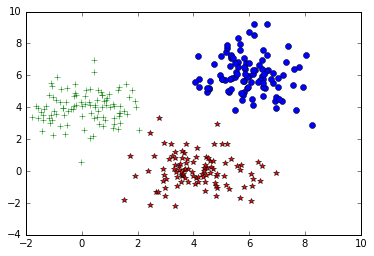

In [14]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

### Run MLlib K-Mean

In [15]:
import numpy as np

# plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

# calculate distance from the predicted centroid
def error(point, model):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

# runner
def RunMLlibKMean(iteration):
    print '\n\nMLlib Kmean result with %d iterations: ' %iteration
    data = sc.textFile('data.csv')
    parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))
    clusters = KMeans.train(parsedData, k=3, runs=iteration, maxIterations=iteration, initializationMode='random')
    plot_iteration(clusters.centers)
    WSSSE = parsedData.map(lambda point: error(point, clusters)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))



MLlib Kmean result with 1 iterations: 


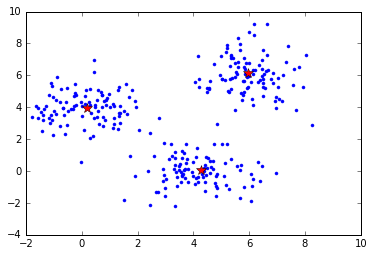

Within Set Sum of Squared Error = 384.735298954


MLlib Kmean result with 10 iterations: 


/home/cloudera/Downloads/spark-2.0.1-bin-hadoop2.6/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


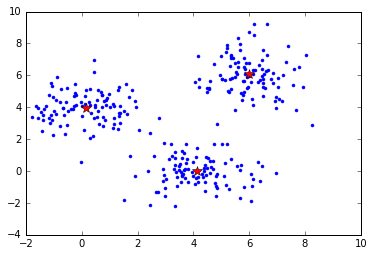

Within Set Sum of Squared Error = 383.06929263


MLlib Kmean result with 20 iterations: 


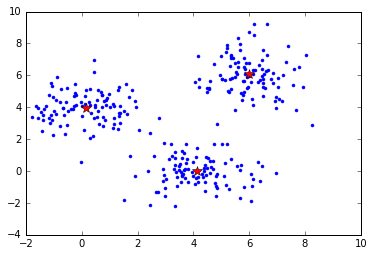

Within Set Sum of Squared Error = 383.06929263


MLlib Kmean result with 30 iterations: 


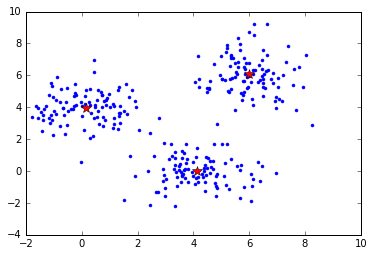

Within Set Sum of Squared Error = 383.06929263


MLlib Kmean result with 40 iterations: 


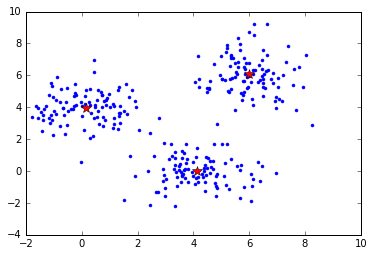

Within Set Sum of Squared Error = 383.06929263


MLlib Kmean result with 50 iterations: 


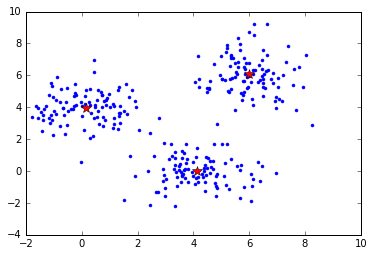

Within Set Sum of Squared Error = 383.06929263


MLlib Kmean result with 100 iterations: 


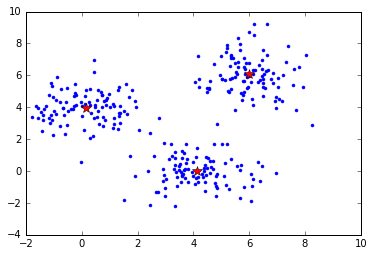

Within Set Sum of Squared Error = 383.06929263


In [16]:
RunMLlibKMean(1)
RunMLlibKMean(10)
RunMLlibKMean(20)
RunMLlibKMean(30)
RunMLlibKMean(40)
RunMLlibKMean(50)
RunMLlibKMean(100)

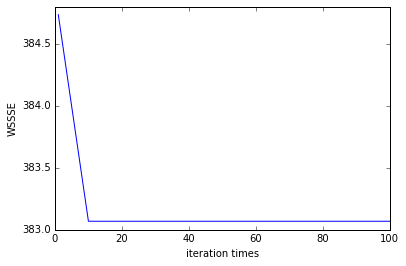

In [19]:
import matplotlib.pyplot as plt

WSSSE_values= [384.735, 383.069, 383.069, 383.069, 383.069, 383.069, 383.069]
iterations = [1, 10, 20, 30, 40, 50, 100]

plt.plot(iterations, WSSSE_values)
plt.xlabel('iteration times')
plt.ylabel('WSSSE')
plt.show()

## HW10.4


Iteration 1


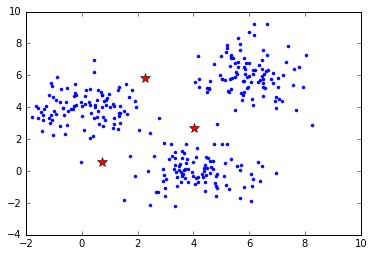

Within Set Sum of Squared Error = 888.748398062

Iteration 10


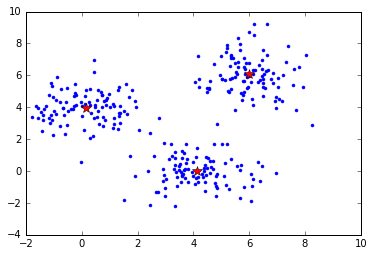

Within Set Sum of Squared Error = 383.06929263

Iteration 20


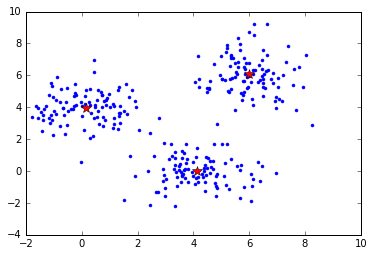

Within Set Sum of Squared Error = 383.06929263

Iteration 100


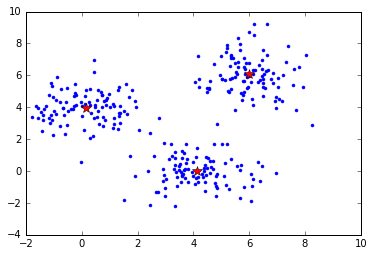

Within Set Sum of Squared Error = 383.06929263

Final Results:
[[ 0.15983033  3.9570184 ]
 [ 4.14685369 -0.02151149]
 [ 5.9957981   6.05608489]]


In [21]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(x):    
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

def DistancetoCenter(p):
    return np.sqrt(np.sum((p-centroids)**2, axis=1).min())

K = 3
# Initialization
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").map(lambda line: np.array([float(x) for x in line.split(',')])).cache()
for i in range(100):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    # sort by clusted ID
    res = sorted(res,key = lambda x : x[0]) 
    # average by cluster size
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  
    centroids = centroids_new
    if (i+1) in [1,10,20,100]:        
        print "\nIteration %d" %(i+1)
        #print centroids
        plot_iteration(centroids)
        WSSSE = D.map(DistancetoCenter).reduce(lambda x, y: x + y)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
print "\nFinal Results:"
print centroids

#### We have similar results compared to HW10.3 with MLlib code

## HW 10.5


Iteration 1


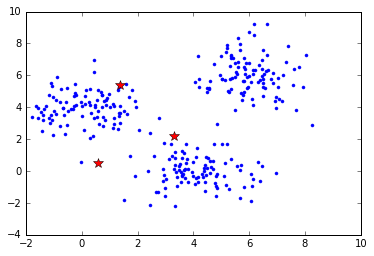

Within Set Sum of Squared Error = 891.893822637

Iteration 10


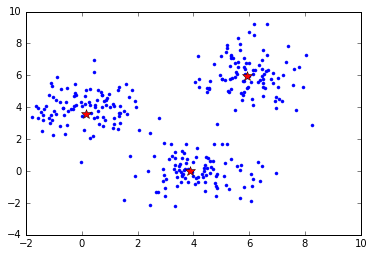

Within Set Sum of Squared Error = 390.530534988

Iteration 20


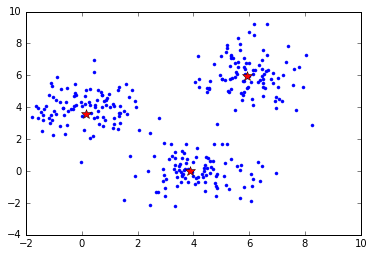

Within Set Sum of Squared Error = 390.530534988

Iteration 100


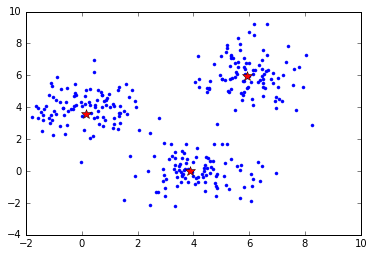

Within Set Sum of Squared Error = 390.530534988

Final Results:
[[ 0.13458369  3.57598499]
 [ 3.87157768 -0.02824737]
 [ 5.93270266  5.95995243]]


In [22]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(x):    
    norm = np.sqrt(sum(x**2))
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    # weight centroid
    return (closest_centroid_idx,(x/norm,1/norm))

def DistancetoCenter(p):
    return np.sqrt(np.sum((p-centroids)**2, axis=1).min())

K = 3
# Initialization
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").map(lambda line: np.array([float(x) for x in line.split(',')])).cache()
for i in range(200):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0]) 
    centroids_new = np.array([x[1][0]/x[1][1] for x in res]) 
    centroids = centroids_new
    if (i+1) in [1,10,20,100]:        
        print "\nIteration %d" %(i+1)     
        # print centroids
        plot_iteration(centroids)
        WSSSE = D.map(DistancetoCenter).reduce(lambda x, y: x + y)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
print "\nFinal Results:"
print centroids

## HW10.6.1

In [23]:
import numpy as np
import csv
def data_generate(fileName, w=[0,0], size=100, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True
# model wegiht, true model y = 6x − 3.

w = [6,-3]
# training data
data_generate('data_train_10_6.csv', w, 100, 0)
data_generate('data_test_10_6.csv', w, 100, 1)

True

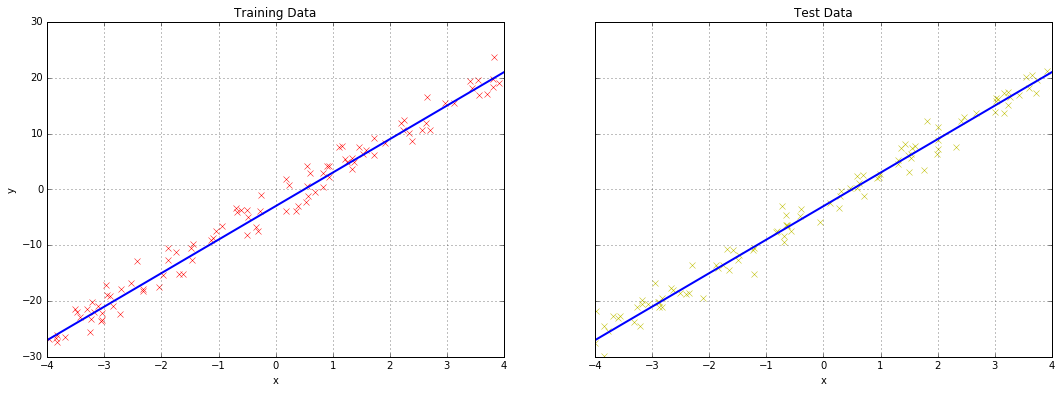

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# true model
x = [-4, 4]
y = [(i * w[0] + w[1]) for i in x]
# load data
with open('data_train_10_6.csv', 'r') as f:
    dataTrain = [[float(p) for p in line.split(',')] for line in f.readlines()]
with open('data_test_10_6.csv', 'r') as f:
    dataTest = [[float(p) for p in line.split(',')] for line in f.readlines()]

# plot the data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches([18,6])
ax1.plot([k[1] for k in dataTrain], [k[0] for k in dataTrain], 'rx')
ax1.plot(x, y, linewidth=2.0)
ax1.set_title('Training Data')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.grid()
ax2.plot([k[1] for k in dataTest], [k[0] for k in dataTest], 'yx')
ax2.plot(x, y, linewidth=2.0)
ax2.set_title('Test Data')
ax2.set_xlabel('x')
ax2.grid()
plt.show()


After 1 iterations: model - [32.904473498219495, -3.921227015244903], Error - 63.7103
After 10 iterations: model - [-226.79579430964122, 8.954591010886933], Error - 549.4227
After 20 iterations: model - [5.9753779395004534, -2.618314851998418], Error - 1.8062
After 30 iterations: model - [5.9840088080515814, -2.6187468853053275], Error - 1.8076
After 40 iterations: model - [5.9840088080515814, -2.6187468853053275], Error - 1.8076
After 50 iterations: model - [5.9840088080515814, -2.6187468853053275], Error - 1.8076


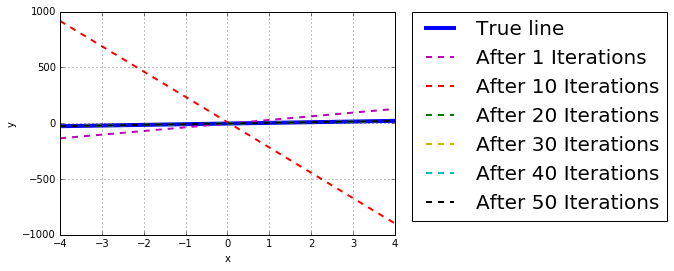

In [30]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from math import sqrt

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])


trainData = sc.textFile("data_train_10_6.csv").map(parsePoint)
testData = sc.textFile('data_test_10_6.csv').map(lambda l: [float(x) for x in l.split(',')])

# x-range
x = [-4, 4]
#w = truew
y = [(i * w[0] + w[1]) for i in x]
plt.plot(x, y, 'b', label="True line", linewidth=4.0)

# Build the model
iterations = [1, 10, 20, 30, 40, 50]
linestyle = ['m--', 'r--', 'g--', 'y--', 'c--', 'k--']
weight = inter = 0
for it, ls in zip(iterations, linestyle):
    model = LinearRegressionWithSGD.train(trainData, intercept=True, iterations=it)
    weight, inter = model.weights[0], model.intercept
    y = [i*weight+inter for i in x]
    # evaluate prediction error
    rms = testData.map(lambda p: ((p[1]*weight+inter - p[0])**2, 1)).reduce(lambda a,b: (a[0]+b[0], a[1]+b[1]))
    print 'After %d iterations: model - %s, Error - %.4f' %(it, str([weight, inter]), sqrt(rms[0]/rms[1]))
    plt.plot(x, y, ls, label="After %d Iterations" %it, linewidth=2.0)
#print model

# display the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#### Stochastic gradient descent will have oscillating behaviors at the first few (between 5 ~ 10) iterations, after that the result will begin to converge. RMS has increased gone up a little after 20 iterations which shows that the model may be over fitted

## HW10.6.2

In [36]:
import numpy as np

def LR_GDReg(data, wInitial=None, learningRate=0.05, iterations=50, regParam=0.01, regType=None):
    featureLen = len(data.take(1)[0])-1
    n = data.count()
    if wInitial is None:
        w = np.random.normal(size=featureLen)
    else:
        w = wInitial
    for i in range(iterations):
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, d[1:])) * np.array(d[1:])) \
                    .reduce(lambda a, b: a + b)
        if regType == "Ridge":            
            wReg = 2*(wBroadcast.value[:-1]+[0])
        elif regType == "Lasso":
            wReg = np.array([np.sign(x) for x in wBroadcast.value[:-1]]+[0])
        else:
            wReg = np.zeros(w.shape[0])
        gradient = gradient + regParam * wReg  #gradient:  GD of Sqaured Error+ GD of regularized term 
        w = w - learningRate * gradient / n
    return w

In [37]:
def ierationsPlot(fileName, truew, regT='Ridge', regP=0.01, learningR=0.05, iterStep=2):
    print 'Regulation type: %s, lambda: %.2f, learning rate: %.2f' %(regT, regP, learningR)
    x = [-4, 4]
    
    w = truew
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'b', label="True line", linewidth=4.0)
    
    data = sc.textFile(fileName).map(lambda line: [float(v) for v in line.split(',')]+[1.0]).cache()
    n = data.count()
    
    np.random.seed(400)
    w = np.random.normal(0,1,2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'r--', label="After 0 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 0 iterations: " + str(squared_error/n)
    
    
    w = LR_GDReg(data, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'g--', label="After %d Iterations" %iterStep, linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(iterStep, squared_error/n)
    
    w = LR_GDReg(data, wInitial=w, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'm--', label="After %d Iterations" %(2*iterStep), linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(2*iterStep, squared_error/n)
    
    w = LR_GDReg(data, wInitial=w, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'y--', label="After %d Iterations" %(3*iterStep), linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(3*iterStep, squared_error/n)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

Regulation type: Ridge, lambda: 0.01, learning rate: 0.05
Mean Squared Error after 0 iterations: 296.900803123
Mean Squared Error after 3 iterations: 11.1213
Mean Squared Error after 6 iterations: 6.6055
Mean Squared Error after 9 iterations: 5.3686


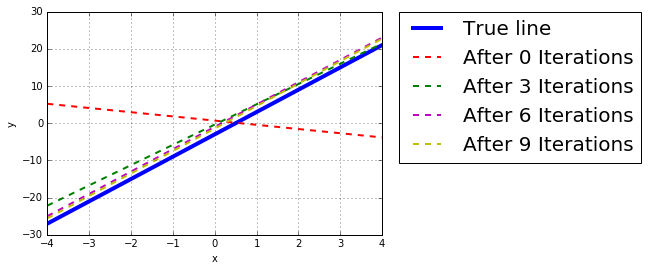

In [39]:
ierationsPlot('data_train_10_6.csv', [6, -3], regP=0.01, regT='Ridge', learningR=0.05, iterStep=3)


Regulation type: Lasso, lambda: 0.01, learning rate: 0.05
Mean Squared Error after 0 iterations: 296.900803123
Mean Squared Error after 3 iterations: 11.1212
Mean Squared Error after 6 iterations: 6.6061
Mean Squared Error after 9 iterations: 5.3693


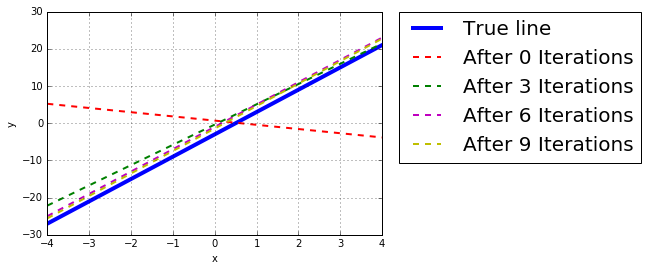

In [40]:
ierationsPlot('data_train_10_6.csv', [6, -3], regP=0.01, regT='Lasso', learningR=0.05, iterStep=3)